In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('FW.csv')

In [2]:
df.head()

,Known As,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Image Link,Age,...,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
0,B. Ogbeche,Bartholomew Ogbeche,70,70,550000,ST,ST,Nigeria,https://cdn.sofifa.net/players/049/486/23_60.png,37,...,64,61,64,51,53,51,49,51,49,17
1,G. Stewart,Greg Stewart,68,68,975000,"CF,ST,CAM",CF,Scotland,https://cdn.sofifa.net/players/223/746/23_60.png,32,...,68,62,68,50,49,50,47,44,47,18
2,D. Diamantakos,Dimitris Diamantakos,68,68,1200000,ST,ST,Greece,https://cdn.sofifa.net/players/210/380/23_60.png,29,...,67,59,67,53,49,53,51,48,51,19
3,Álvaro Vázquez,Álvaro Vázquez García,67,67,850000,ST,ST,Spain,https://cdn.sofifa.net/players/201/403/23_60.png,31,...,67,63,67,55,55,55,53,52,53,19
4,Cleiton Silva,Cleiton Augusto Oliveira Silva,67,67,425000,"ST,LM,RM",ST,Brazil,https://cdn.sofifa.net/players/256/998/23_60.png,35,...,67,62,67,50,47,50,47,40,47,18


In [3]:
len(df)

39

In [4]:
duplicate_rows = df[df.duplicated()]
df.drop_duplicates(inplace=True)
missing_values = df.isnull().sum()
df.dropna(inplace=True)

len(df)

39

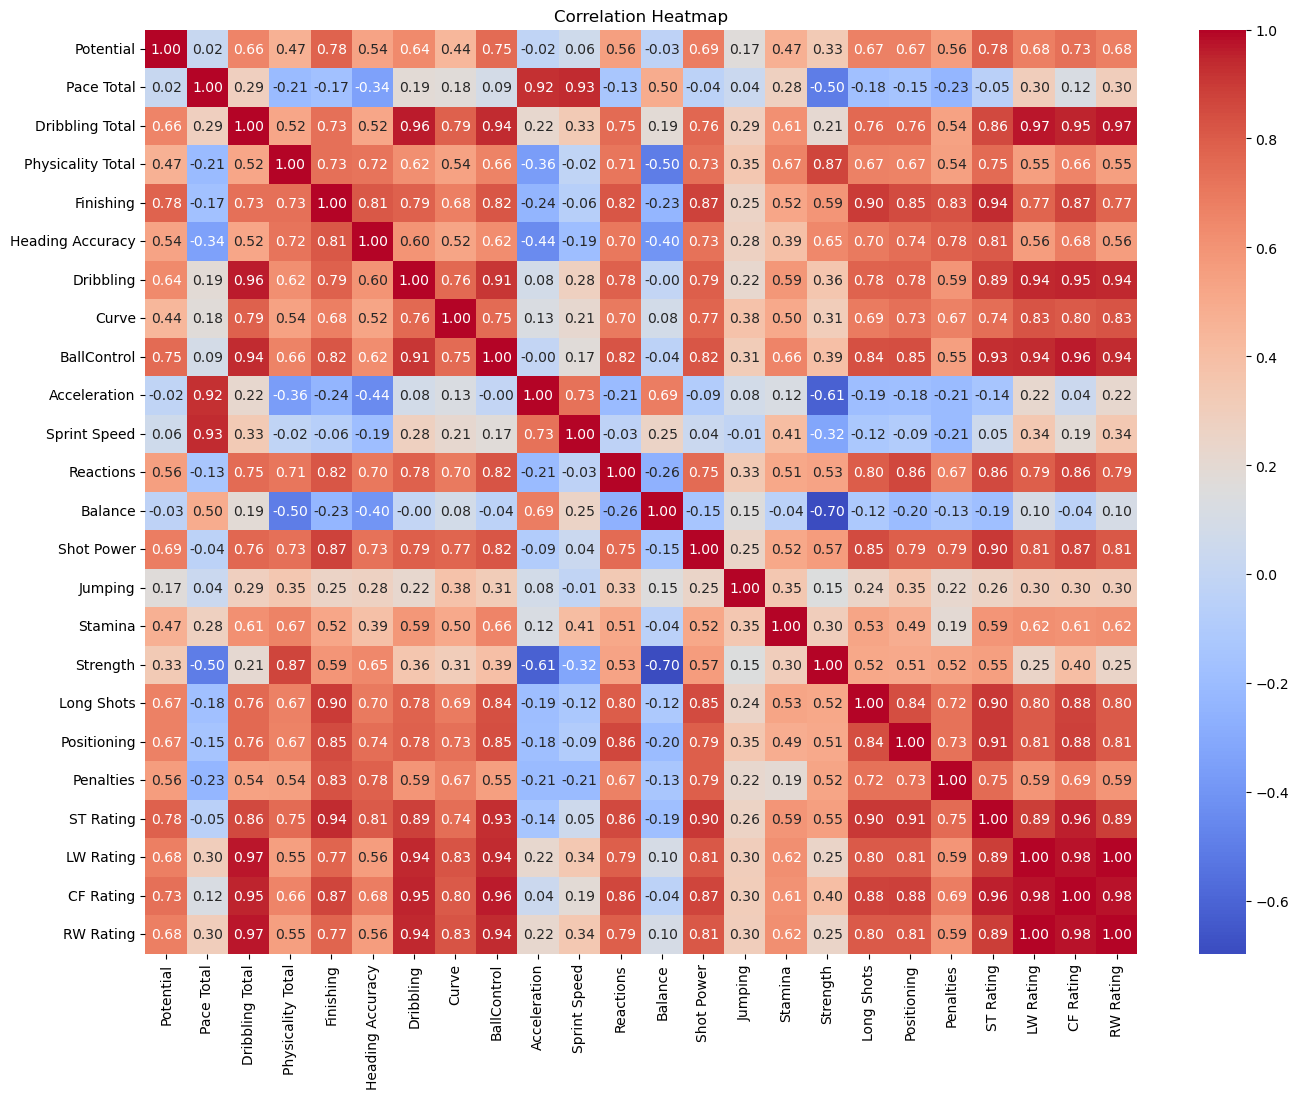

In [15]:
X = df[['Potential','Pace Total','Dribbling Total','Physicality Total','Finishing','Heading Accuracy','Dribbling','Curve','BallControl','Acceleration','Sprint Speed','Reactions','Balance','Shot Power','Jumping','Stamina','Strength','Long Shots','Positioning','Penalties','ST Rating','LW Rating','CF Rating','RW Rating']]

correlation_matrix = X.corr()
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# RandomForest

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Define features (X) and target variable (y)
X = df[['Potential','Pace Total','Dribbling Total','Physicality Total','Finishing','Heading Accuracy','Dribbling','Curve','BallControl','Acceleration','Sprint Speed','Reactions','Balance','Shot Power','Jumping','Stamina','Strength','Long Shots','Positioning','Penalties','ST Rating','LW Rating','CF Rating','RW Rating']]
y = df['Overall']  # Target variable

# Split the data into training and testing sets (adjust test_size as needed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=50)
42
# Initialize the model (Random Forest Regression as an example)
model = RandomForestRegressor(random_state=42)

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

print("All predicted values:")
print(y_pred)

All predicted values:
[66.71 52.41 55.84 64.01 55.52 56.29]


In [80]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_squared_error

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.39206666666666923
R-squared: 0.9860667324777886


In [81]:
# Find the index of the highest predicted overall value
highest_index = y_pred.argmax()

# Retrieve the details of the player with the highest predicted overall value
highest_player_details = df.iloc[X_test.index[highest_index]]

# Print details of the player with the highest predicted overall value
print("Details of the player with the highest predicted overall value:")
print(highest_player_details)

Details of the player with the highest predicted overall value:
Known As            G. Stewart
Full Name         Greg Stewart
Overall                     68
Potential                   68
Value(in Euro)          975000
                      ...     
RWB Rating                  50
LB Rating                   47
CB Rating                   44
RB Rating                   47
GK Rating                   18
Name: 1, Length: 89, dtype: object


In [82]:
y_pred = model.predict(X_test)

# Find the index of the lowest predicted overall value
lowest_index = y_pred.argmin()

# Retrieve the details of the player with the lowest predicted overall value
lowest_player_details = df.iloc[X_test.index[lowest_index]]

# Print details of the player with the lowest predicted overall value
print("Details of the player with the lowest predicted overall value:")
print(lowest_player_details)

Details of the player with the lowest predicted overall value:
Known As              S. Haokip
Full Name         Semboi Haokip
Overall                      53
Potential                    53
Value(in Euro)            90000
                      ...      
RWB Rating                   38
LB Rating                    36
CB Rating                    37
RB Rating                    36
GK Rating                    17
Name: 29, Length: 89, dtype: object


In [83]:
# Filter the original dataframe for Indian players
indian_players_df = df[df['Nationality'] == 'India']

# Get the indices of Indian players in the original dataframe
indian_players_indices = indian_players_df.index.tolist()

# Filter the predictions to only include Indian players from the test set
indian_players_predictions = y_pred[X_test.index.isin(indian_players_indices)]

if len(indian_players_predictions) > 0:
    # Find the index of the highest predicted overall value among Indian players
    highest_indian_index = indian_players_predictions.argmax()

    # Retrieve the index of the player with the highest predicted overall value among Indian players
    index_in_indian_players = indian_players_indices[highest_indian_index]

    # Retrieve the details of the Indian player with the highest predicted overall value
    highest_indian_player_details = df.iloc[index_in_indian_players]

    # Print details of the Indian player with the highest predicted overall value
    print("Details of the Indian player with the highest predicted overall value:")
    print(highest_indian_player_details)
else:
    print("No Indian players in the test set.")

Details of the Indian player with the highest predicted overall value:
Known As             I. Pandita
Full Name         Ishan Pandita
Overall                      58
Potential                    65
Value(in Euro)           400000
                      ...      
RWB Rating                   44
LB Rating                    42
CB Rating                    38
RB Rating                    42
GK Rating                    16
Name: 20, Length: 89, dtype: object


In [225]:
# Filter the original dataframe for Indian players
indian_players_df = df[df['Nationality'] == 'India']

# Get the indices of Indian players in the original dataframe
indian_players_indices = indian_players_df.index.tolist()

# Filter the predictions to only include Indian players from the test set
indian_players_predictions = y_pred[X_test.index.isin(indian_players_indices)]

if len(indian_players_predictions) > 0:
    # Sort the Indian players' predictions and indices in descending order
    sorted_indices = sorted(range(len(indian_players_predictions)), key=lambda i: indian_players_predictions[i], reverse=True)[:4]

    # Retrieve the indices of the top five players among Indian players
    top_five_indices = [indian_players_indices[i] for i in sorted_indices]

    # Retrieve the details of the top five Indian players with the highest predicted overall value
    top_five_indian_players = df.iloc[top_five_indices]

    # Print details of the top five Indian players with the highest predicted overall value
    print("Details of the top five Indian players with the highest predicted overall value:")
    print(top_five_indian_players)
else:
    print("No Indian players in the test set.")

Details of the top five Indian players with the highest predicted overall value:
      Known As      Full Name  Overall  Potential  Value(in Euro)  \
20  I. Pandita  Ishan Pandita       58         65          400000   
18    U. Singh   Udanta Singh       59         60          275000   
19    M. Singh   Manvir Singh       59         60          275000   
10  S. Chhetri  Sunil Chhetri       65         65          230000   

   Positions Played Best Position Nationality  \
20               ST            ST       India   
18            RW,LW            RW       India   
19            RW,ST            ST       India   
10            LW,ST            ST       India   

                                          Image Link  Age  ...  LM Rating  \
20  https://cdn.sofifa.net/players/236/546/23_60.png   24  ...         57   
18  https://cdn.sofifa.net/players/233/524/23_60.png   26  ...         60   
19  https://cdn.sofifa.net/players/248/300/23_60.png   26  ...         60   
10  https://cdn.sof

# LinearRegression

In [97]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Assuming 'X' contains the features and 'y' contains the target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=50)

# Initialize the linear regression model
linear_reg = LinearRegression()

# Fit the model to the training data
linear_reg.fit(X_train, y_train)

# Make predictions on the test data
y_pred = linear_reg.predict(X_test)

print("All predicted values:")
print(y_pred)


All predicted values:
[68.29386489 53.02344225 55.85356531 62.89657541 56.96807238 56.76380953]


In [98]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# To print coefficients and intercept
print("Coefficients:", linear_reg.coef_)
print("Intercept:", linear_reg.intercept_)

Mean Squared Error: 0.4744106974814167
R-squared: 0.9831403898229704
Coefficients: [-1.92440096e-01  3.77434093e-02 -4.00827634e-01  7.25319660e-02
  4.28250432e-02 -1.59973892e-02  2.35730652e-01  2.62863415e-02
  2.34091669e-01  2.10377825e-04  7.96397163e-03  2.98140209e-02
  4.11802521e-02  2.67248327e-02 -1.65198502e-02 -3.61476892e-02
 -3.65990349e-02  1.77499431e-02  2.80053657e-02 -3.07009277e-02
  1.01885788e+00  4.31398139e-02 -1.84115720e-01  4.31398139e-02]
Intercept: 0.6910975220249682


In [102]:
# Find the index of the highest predicted overall value
highest_index = y_pred.argmax()

# Retrieve the details of the player with the highest predicted overall value
highest_player_details = df.iloc[X_test.index[highest_index]]

# Print details of the player with the highest predicted overall value
print("Details of the player with the highest predicted overall value:")
print(highest_player_details)

Details of the player with the highest predicted overall value:
Known As            G. Stewart
Full Name         Greg Stewart
Overall                     68
Potential                   68
Value(in Euro)          975000
                      ...     
RWB Rating                  50
LB Rating                   47
CB Rating                   44
RB Rating                   47
GK Rating                   18
Name: 1, Length: 89, dtype: object


In [228]:
# Filter the original dataframe for Indian players
indian_players_df = df[df['Nationality'] == 'India']

# Get the indices of Indian players in the original dataframe
indian_players_indices = indian_players_df.index.tolist()

# Filter the predictions to only include Indian players from the test set
indian_players_predictions = y_pred[X_test.index.isin(indian_players_indices)]

if len(indian_players_predictions) > 0:
    # Sort the Indian players' predictions and indices in descending order
    sorted_indices = sorted(range(len(indian_players_predictions)), key=lambda i: indian_players_predictions[i], reverse=True)[:4]

    # Retrieve the indices of the top five players among Indian players
    top_five_indices = [indian_players_indices[i] for i in sorted_indices]

    # Retrieve the details of the top five Indian players with the highest predicted overall value
    top_five_indian_players = df.iloc[top_five_indices]

    # Print details of the top five Indian players with the highest predicted overall value
    print("Details of the top five Indian players with the highest predicted overall value:")
    print(top_five_indian_players)
else:
    print("No Indian players in the test set.")

Details of the top five Indian players with the highest predicted overall value:
      Known As      Full Name  Overall  Potential  Value(in Euro)  \
20  I. Pandita  Ishan Pandita       58         65          400000   
18    U. Singh   Udanta Singh       59         60          275000   
19    M. Singh   Manvir Singh       59         60          275000   
10  S. Chhetri  Sunil Chhetri       65         65          230000   

   Positions Played Best Position Nationality  \
20               ST            ST       India   
18            RW,LW            RW       India   
19            RW,ST            ST       India   
10            LW,ST            ST       India   

                                          Image Link  Age  ...  LM Rating  \
20  https://cdn.sofifa.net/players/236/546/23_60.png   24  ...         57   
18  https://cdn.sofifa.net/players/233/524/23_60.png   26  ...         60   
19  https://cdn.sofifa.net/players/248/300/23_60.png   26  ...         60   
10  https://cdn.sof

# DecisionTree

In [154]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split


# Assuming 'X' contains the features and 'y' contains the target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=50)

# Initialize the decision tree regressor model
tree_reg = DecisionTreeRegressor()

# Fit the model to the training data
tree_reg.fit(X_train, y_train)

# Make predictions on the test data
y_pred = tree_reg.predict(X_test)

# Print all predicted values
print("All predicted values:")
print(y_pred)

All predicted values:
[67. 53. 56. 64. 56. 55.]


In [155]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.3333333333333333
R-squared: 0.9881539980256664


In [230]:
# Find the index of the highest predicted overall value
highest_index = y_pred.argmax()

# Retrieve the details of the player with the highest predicted overall value
highest_player_details = df.iloc[X_test.index[highest_index]]

# Print details of the player with the highest predicted overall value
print("Details of the player with the highest predicted overall value:")
print(highest_player_details)

Details of the player with the highest predicted overall value:
Known As            G. Stewart
Full Name         Greg Stewart
Overall                     68
Potential                   68
Value(in Euro)          975000
                      ...     
RWB Rating                  50
LB Rating                   47
CB Rating                   44
RB Rating                   47
GK Rating                   18
Name: 1, Length: 89, dtype: object


In [229]:
# Filter the original dataframe for Indian players
indian_players_df = df[df['Nationality'] == 'India']

# Get the indices of Indian players in the original dataframe
indian_players_indices = indian_players_df.index.tolist()

# Filter the predictions to only include Indian players from the test set
indian_players_predictions = y_pred[X_test.index.isin(indian_players_indices)]

if len(indian_players_predictions) > 0:
    # Sort the Indian players' predictions and indices in descending order
    sorted_indices = sorted(range(len(indian_players_predictions)), key=lambda i: indian_players_predictions[i], reverse=True)[:4]

    # Retrieve the indices of the top five players among Indian players
    top_five_indices = [indian_players_indices[i] for i in sorted_indices]

    # Retrieve the details of the top five Indian players with the highest predicted overall value
    top_five_indian_players = df.iloc[top_five_indices]

    # Print details of the top five Indian players with the highest predicted overall value
    print("Details of the top five Indian players with the highest predicted overall value:")
    print(top_five_indian_players)
else:
    print("No Indian players in the test set.")

Details of the top five Indian players with the highest predicted overall value:
      Known As      Full Name  Overall  Potential  Value(in Euro)  \
20  I. Pandita  Ishan Pandita       58         65          400000   
18    U. Singh   Udanta Singh       59         60          275000   
19    M. Singh   Manvir Singh       59         60          275000   
10  S. Chhetri  Sunil Chhetri       65         65          230000   

   Positions Played Best Position Nationality  \
20               ST            ST       India   
18            RW,LW            RW       India   
19            RW,ST            ST       India   
10            LW,ST            ST       India   

                                          Image Link  Age  ...  LM Rating  \
20  https://cdn.sofifa.net/players/236/546/23_60.png   24  ...         57   
18  https://cdn.sofifa.net/players/233/524/23_60.png   26  ...         60   
19  https://cdn.sofifa.net/players/248/300/23_60.png   26  ...         60   
10  https://cdn.sof

# Support Vector Regression

In [192]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split

# Assuming 'X' contains the features and 'y' contains the target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=50)

# Initialize the Support Vector Machine for Regression (SVR) model
svm_reg = SVR(kernel='rbf')  # 'rbf' kernel is often used for non-linear relationships

# Fit the model to the training data
svm_reg.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm_reg.predict(X_test)

# Print all predicted values
print("All predicted values:")
print(y_pred)

All predicted values:
[63.86372949 54.39932018 57.85706897 63.93552242 57.35971255 55.99876068]


In [193]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 4.061418834267303
R-squared: 0.8556652734120208


In [194]:
# Find the index of the highest predicted overall value
highest_index = y_pred.argmax()

# Retrieve the details of the player with the highest predicted overall value
highest_player_details = df.iloc[X_test.index[highest_index]]

# Print details of the player with the highest predicted overall value
print("Details of the player with the highest predicted overall value:")
print(highest_player_details)

Details of the player with the highest predicted overall value:
Known As                 A. Giannou
Full Name         Apostolos Giannou
Overall                          64
Potential                        64
Value(in Euro)               475000
                        ...        
RWB Rating                       49
LB Rating                        48
CB Rating                        49
RB Rating                        48
GK Rating                        19
Name: 12, Length: 89, dtype: object


In [231]:
# Filter the original dataframe for Indian players
indian_players_df = df[df['Nationality'] == 'India']

# Get the indices of Indian players in the original dataframe
indian_players_indices = indian_players_df.index.tolist()

# Filter the predictions to only include Indian players from the test set
indian_players_predictions = y_pred[X_test.index.isin(indian_players_indices)]

if len(indian_players_predictions) > 0:
    # Sort the Indian players' predictions and indices in descending order
    sorted_indices = sorted(range(len(indian_players_predictions)), key=lambda i: indian_players_predictions[i], reverse=True)[:4]

    # Retrieve the indices of the top five players among Indian players
    top_five_indices = [indian_players_indices[i] for i in sorted_indices]

    # Retrieve the details of the top five Indian players with the highest predicted overall value
    top_five_indian_players = df.iloc[top_five_indices]

    # Print details of the top five Indian players with the highest predicted overall value
    print("Details of the top five Indian players with the highest predicted overall value:")
    print(top_five_indian_players)
else:
    print("No Indian players in the test set.")


Details of the top five Indian players with the highest predicted overall value:
      Known As      Full Name  Overall  Potential  Value(in Euro)  \
20  I. Pandita  Ishan Pandita       58         65          400000   
18    U. Singh   Udanta Singh       59         60          275000   
19    M. Singh   Manvir Singh       59         60          275000   
10  S. Chhetri  Sunil Chhetri       65         65          230000   

   Positions Played Best Position Nationality  \
20               ST            ST       India   
18            RW,LW            RW       India   
19            RW,ST            ST       India   
10            LW,ST            ST       India   

                                          Image Link  Age  ...  LM Rating  \
20  https://cdn.sofifa.net/players/236/546/23_60.png   24  ...         57   
18  https://cdn.sofifa.net/players/233/524/23_60.png   26  ...         60   
19  https://cdn.sofifa.net/players/248/300/23_60.png   26  ...         60   
10  https://cdn.sof

# K-Nearest Neighbors

In [218]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

# Assuming 'X' contains the features and 'y' contains the target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=50)

# Initialize the KNN regressor model (with, for instance, k=5 neighbors)
knn_reg = KNeighborsRegressor(n_neighbors=5)

# Fit the model to the training data
knn_reg.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn_reg.predict(X_test)

# Print all predicted values
print("All predicted values:")
print(y_pred)

All predicted values:
[65.4 52.2 55.  65.4 55.  56.8]


In [219]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 1.9999999999999962
R-squared: 0.9289239881539981


In [220]:
# Find the index of the highest predicted overall value
highest_index = y_pred.argmax()

# Retrieve the details of the player with the highest predicted overall value
highest_player_details = df.iloc[X_test.index[highest_index]]

# Print details of the player with the highest predicted overall value
print("Details of the player with the highest predicted overall value:")
print(highest_player_details)

Details of the player with the highest predicted overall value:
Known As            G. Stewart
Full Name         Greg Stewart
Overall                     68
Potential                   68
Value(in Euro)          975000
                      ...     
RWB Rating                  50
LB Rating                   47
CB Rating                   44
RB Rating                   47
GK Rating                   18
Name: 1, Length: 89, dtype: object


In [232]:
# Filter the original dataframe for Indian players
indian_players_df = df[df['Nationality'] == 'India']

# Get the indices of Indian players in the original dataframe
indian_players_indices = indian_players_df.index.tolist()

# Filter the predictions to only include Indian players from the test set
indian_players_predictions = y_pred[X_test.index.isin(indian_players_indices)]

if len(indian_players_predictions) > 0:
    # Sort the Indian players' predictions and indices in descending order
    sorted_indices = sorted(range(len(indian_players_predictions)), key=lambda i: indian_players_predictions[i], reverse=True)[:4]

    # Retrieve the indices of the top five players among Indian players
    top_five_indices = [indian_players_indices[i] for i in sorted_indices]

    # Retrieve the details of the top five Indian players with the highest predicted overall value
    top_five_indian_players = df.iloc[top_five_indices]

    # Print details of the top five Indian players with the highest predicted overall value
    print("Details of the top five Indian players with the highest predicted overall value:")
    print(top_five_indian_players)
else:
    print("No Indian players in the test set.")

Details of the top five Indian players with the highest predicted overall value:
      Known As      Full Name  Overall  Potential  Value(in Euro)  \
20  I. Pandita  Ishan Pandita       58         65          400000   
18    U. Singh   Udanta Singh       59         60          275000   
19    M. Singh   Manvir Singh       59         60          275000   
10  S. Chhetri  Sunil Chhetri       65         65          230000   

   Positions Played Best Position Nationality  \
20               ST            ST       India   
18            RW,LW            RW       India   
19            RW,ST            ST       India   
10            LW,ST            ST       India   

                                          Image Link  Age  ...  LM Rating  \
20  https://cdn.sofifa.net/players/236/546/23_60.png   24  ...         57   
18  https://cdn.sofifa.net/players/233/524/23_60.png   26  ...         60   
19  https://cdn.sofifa.net/players/248/300/23_60.png   26  ...         60   
10  https://cdn.sof